# Missão: Analisar o Comportamento de Compra de Consumidores.

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

** Contagem de Compradores **

* Número total de compradores


** Análise Geral de Compras **

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


** Informações Demográficas Por Gênero **

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


** Análise de Compras Por Gênero **

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


** Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela): **

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


** Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


** Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


** Como considerações finais: **

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.


In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando o arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## Informações Sobre os Compradores

In [3]:
player_demographics = purchase_file.loc[:, ["Sexo", "Login", "Idade"]]
player_demographics.head()

,Sexo,Login,Idade
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23


In [4]:
# Limpeza dos dados e remoção de duplicatas
player_demographics = player_demographics.drop_duplicates()
player_count = player_demographics.count()[0]
player_count

573

In [5]:
# Converter saída para DF para uso posterior em análise
pd.DataFrame({"Total de Jogadores" : [player_count]})

,Total de Jogadores
0,573


## Análise de Compra

In [6]:
# Cálculos básicos
average_item_price = purchase_file["Valor"].mean()
total_item_price = purchase_file["Valor"].sum()
total_item_count = purchase_file["Valor"].count()
item_id = len(purchase_file["Item ID"].unique())

# Dataframe para os resultados
summary_calculations = pd.DataFrame({"Número de Itens Únicos" : item_id,
                                     "Número de Compras" : total_item_count, 
                                     "Total de Vendas" : total_item_price, 
                                     "Preço Médio" : [average_item_price]})

# Data Munging
summary_calculations = summary_calculations.round(2)
summary_calculations ["Preço Médio"] = summary_calculations["Preço Médio"].map("${:,.2f}".format)
summary_calculations ["Total de Vendas"] = summary_calculations["Total de Vendas"].map("${:,.2f}".format)
summary_calculations = summary_calculations.loc[:, ["Número de Itens Únicos", "Preço Médio", "Número de Compras", "Total de Vendas"]]

summary_calculations

,Número de Itens Únicos,Preço Médio,Número de Compras,Total de Vendas
0,183,$2.93,780,"$2,286.33"


In [7]:
#Observacao de cada um dos ID_itens
purchase_file["Item ID"].unique()

array([164, 119, 174,  92,  63,  10, 153, 169, 118,  99,  57,  47,  81,
        77,  44,  96, 123,  59,  91, 177,  78,   3,  11, 183,  65, 132,
       106,  49,  45, 155,  37,  48,  90,  13, 171,  25,   7, 124,  68,
        85, 120,  17, 141,  73, 151,  32, 165,  51, 101, 140,  31,  34,
         2,  86,  39,  28, 160, 134,  83,  38, 158, 110, 122,  54, 105,
        87,  23, 144, 128, 175,  46, 150, 152, 108, 172, 167, 181,  20,
       130, 111, 103,  30, 139, 173,  55, 115,  35,  42,   9,  84, 180,
       102,  53,  18,  74, 126,  50,  62, 125, 121, 129, 149,  12,  71,
        14,  58,  27,  52,  66, 100, 112,  24,  94, 107,   0, 182,  97,
        70,  89,   1, 170,  93, 179,  36,  75, 143, 137, 176, 148, 127,
       147, 161, 154, 157, 116,  61, 131,  41, 145,  60, 162, 135,   8,
        40,  15,  29,  72, 114, 117,  79,  88, 104,  95,  64,  98,  33,
        76, 146, 166,  56,  22,  21,  16,  67, 133,  69, 159,  82, 113,
         6, 163,   5,  19, 168, 136,  80,  26, 142, 178, 156, 10

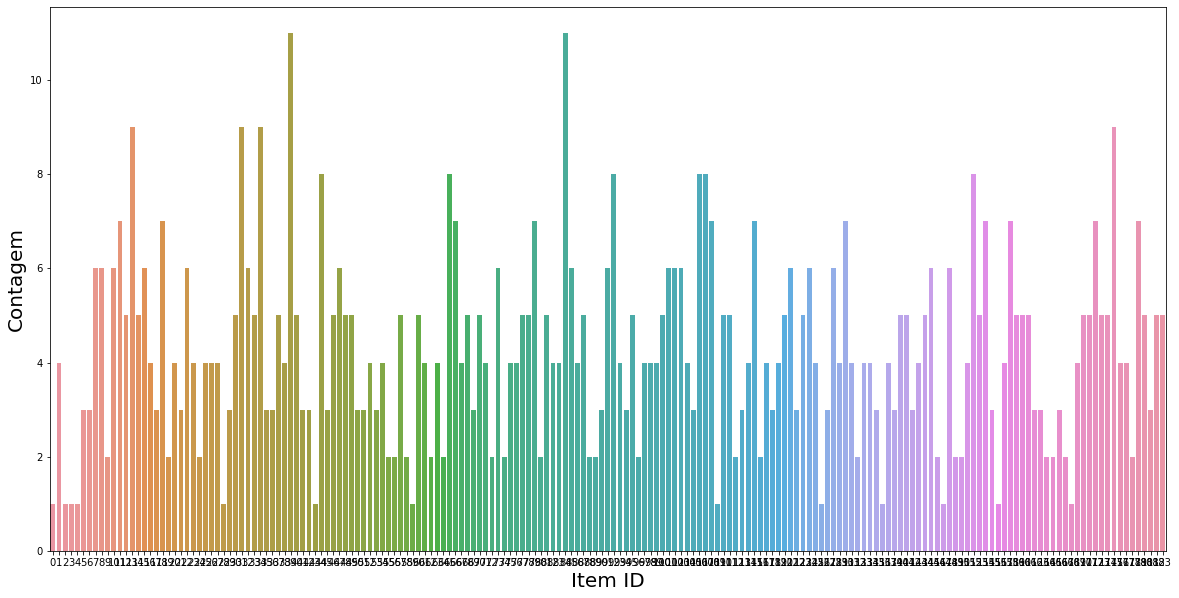

In [8]:
#Contagem de Cada item vendido
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(purchase_file["Item ID"])
plt.xlabel('Item ID', fontsize=20)
plt.ylabel('Contagem', fontsize=20)
plt.show()

## Informações Demográficas

In [9]:
# Cálculos básicos
gender_count = player_demographics["Sexo"].value_counts()
gender_percent = (gender_count / player_count) * 100

# Dataframe para os resultados
gender_demographics = pd.DataFrame({"Sexo" : gender_count, 
                                    "%" : gender_percent})

# Data Munging
gender_demographics = gender_demographics.round(2)
gender_demographics ["%"] = gender_demographics["%"].map("{:,.1f}%".format)

In [10]:
# Output Test
gender_count

Masculino                465
Feminino                 100
Outro / Não Divulgado      8
Name: Sexo, dtype: int64

                       Sexo      %
Masculino               465  81.2%
Feminino                100  17.4%
Outro / Não Divulgado     8   1.4%


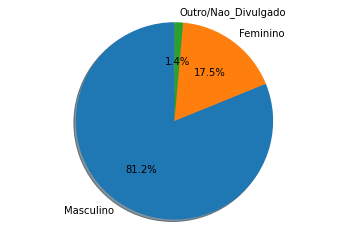

In [11]:
# Criando grafico de pizza
labels = 'Masculino','Feminino','Outro/Nao_Divulgado'
explode = (0, 0.1, 0, 0)
fig, ax = plt.subplots()
ax.pie(gender_percent, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # A proporção igual garante que a pizza seja desenhada como um círculo.
print(gender_demographics)
plt.show()

## Análise de Compra Por Gênero

In [12]:
# Agrupamentos
gender_total_item_price = purchase_file.groupby(["Sexo"]).sum()["Valor"].rename("Total de Vendas")
gender_average_item_price = purchase_file.groupby(["Sexo"]).mean()["Valor"].rename("Average Price")
purchase_count = purchase_file.groupby(["Sexo"]).count()["Valor"].rename("Número de Compras")
normalized_total = gender_total_item_price / gender_demographics["Sexo"]

# Armazenando o resultado em um Dataframe
gender_purchasing_analysis = pd.DataFrame({"Número de Compras" : purchase_count, 
                                           "Valor Médio Por Item" : gender_average_item_price, 
                                           "Total de Vendas" : gender_total_item_price, 
                                           "Total Normalizado" : normalized_total})

# Data Munging
gender_purchasing_analysis = gender_purchasing_analysis.round(2)
gender_purchasing_analysis ["Valor Médio Por Item"] = gender_purchasing_analysis["Valor Médio Por Item"].map("${:,.2f}".format)
gender_purchasing_analysis ["Total de Vendas"] = gender_purchasing_analysis["Total de Vendas"].map("${:,.2f}".format)
gender_purchasing_analysis ["Total Normalizado"] = gender_purchasing_analysis["Total Normalizado"].map("${:,.2f}".format)

In [13]:
# Resultado
gender_total_item_price

Sexo
Feminino                  382.91
Masculino                1867.68
Outro / Não Divulgado      35.74
Name: Total de Vendas, dtype: float64

In [14]:
# Resultado
gender_average_item_price

Sexo
Feminino                 2.815515
Masculino                2.950521
Outro / Não Divulgado    3.249091
Name: Average Price, dtype: float64

In [15]:
# Resultado
normalized_total

Feminino                 3.829100
Masculino                4.016516
Outro / Não Divulgado    4.467500
dtype: float64

In [16]:
# Resultado
gender_purchasing_analysis

,Número de Compras,Valor Médio Por Item,Total de Vendas,Total Normalizado
Sexo,,,,
Feminino,136,$2.82,$382.91,$3.83
Masculino,633,$2.95,"$1,867.68",$4.02
Outro / Não Divulgado,11,$3.25,$35.74,$4.47


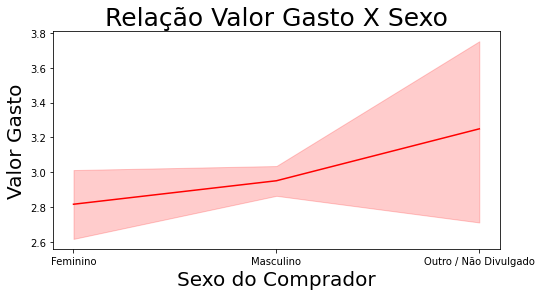

In [17]:
# Grafico Relação Valor Gasto X Sexo
plt.figure(figsize=(8,4))
plt.title('Relação Valor Gasto X Sexo', fontsize=25)
sns.lineplot(x="Sexo", y="Valor",data=purchase_file,color='red')
plt.xlabel('Sexo do Comprador', fontsize=20)
plt.ylabel('Valor Gasto', fontsize=20)
plt.show()

## Análise Demográfica

In [18]:
player_demographics

,Sexo,Login,Idade
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23
...,...,...,...
771,Masculino,Lassista97,24
772,Masculino,Sidap51,15
773,Masculino,Chamadarsda63,21
778,Masculino,Quelaton80,20


In [19]:
# Cálculos básicos
age_bins = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
age_bracket = ["Menos de 10", "10 a 14", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "Mais de 40"]

purchase_file["Range de Idades"] = pd.cut(purchase_file["Idade"], age_bins, labels=age_bracket)

# Cálculos básicos
age_demographics_count = purchase_file["Range de Idades"].value_counts()
age_demographics_average_item_price = purchase_file.groupby(["Range de Idades"]).mean()["Valor"]
age_demographics_total_item_price = purchase_file.groupby(["Range de Idades"]).sum()["Valor"]
age_demographics_percent = (age_demographics_count / player_count) * 100

# Dataframe para os resultados
age_demographics = pd.DataFrame({"Contagem": age_demographics_count, "%": age_demographics_percent, "Valor Unitario": age_demographics_average_item_price, "Valor Total de Compra": age_demographics_total_item_price})

# Data Munging
age_demographics ["Valor Unitario"] = age_demographics["Valor Unitario"].map("${:,.2f}".format)
age_demographics ["Valor Total de Compra"] = age_demographics["Valor Total de Compra"].map("${:,.2f}".format)
age_demographics ["%"] = age_demographics["%"].map("{:,.2f}%".format)

In [20]:
# Resultado
player_demographics.head()

,Sexo,Login,Idade
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23


In [21]:
# Resultado
age_demographics = age_demographics.sort_index()
age_demographics

,Contagem,%,Valor Unitario,Valor Total de Compra
Menos de 10,28,4.89%,$2.98,$83.46
10 a 14,35,6.11%,$2.77,$96.95
15 a 19,133,23.21%,$2.91,$386.42
20 a 24,336,58.64%,$2.91,$978.77
25 a 29,125,21.82%,$2.96,$370.33
30 a 34,64,11.17%,$3.08,$197.25
35 a 39,42,7.33%,$2.84,$119.40
Mais de 40,17,2.97%,$3.16,$53.75


## Top Spenders

In [22]:
# Cálculos básicos
user_total = purchase_file.groupby(["Login"]).sum()["Valor"].rename("Valor Total de Compra")
user_average = purchase_file.groupby(["Login"]).mean()["Valor"].rename("Valor Médio de Compra")
user_count = purchase_file.groupby(["Login"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
user_data = pd.DataFrame({"Valor Total de Compra": user_total, "Valor Médio de Compra": user_average, "Número de Compras": user_count})

# Data Munging
user_data ["Valor Total de Compra"] = user_data["Valor Total de Compra"].map("${:,.2f}".format)
user_data ["Valor Médio de Compra"] = user_data["Valor Médio de Compra"].map("${:,.2f}".format)
user_data.sort_values("Valor Total de Compra", ascending=False).head(5)

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Login,,,
Qarwen67,$9.97,$2.49,4
Sondim43,$9.38,$3.13,3
Tillyrin30,$9.19,$3.06,3
Lisistaya47,$9.19,$3.06,3
Tyisriphos58,$9.18,$4.59,2


In [23]:
# Resultado 
user_data

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Login,,,
Adairialis76,$2.46,$2.46,1
Aduephos78,$6.70,$2.23,3
Aeduera68,$5.80,$1.93,3
Aela49,$2.46,$2.46,1
Aela59,$1.27,$1.27,1
...,...,...,...
Yasurra52,$3.14,$3.14,1
Yathecal72,$7.77,$3.88,2
Yathecal82,$2.41,$2.41,1


## Itens Mais Populares

In [24]:
# Cálculos básicos
user_total = purchase_file.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor Total de Compra")
user_average = purchase_file.groupby(["Nome do Item"]).mean()["Valor"].rename("Valor Médio de Compra")
user_count = purchase_file.groupby(["Nome do Item"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
user_data = pd.DataFrame({"Valor Total de Compra": user_total, "Valor Médio de Compra": user_average, "Número de Compras": user_count})

# Data Munging
user_data ["Valor Total de Compra"] = user_data["Valor Total de Compra"].map("${:,.2f}".format)
user_data ["Valor Médio de Compra"] = user_data["Valor Médio de Compra"].map("${:,.2f}".format)
user_data.sort_values("Número de Compras", ascending=False).head(5)

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Nome do Item,,,
Final Critic,$38.60,$2.76,14
Arcane Gem,$24.53,$2.23,11
"Betrayal, Whisper of Grieving Widows",$25.85,$2.35,11
Stormcaller,$34.65,$3.46,10
Woeful Adamantite Claymore,$11.16,$1.24,9


In [25]:
# Verificando itens menos vendidos
user_data.sort_values("Número de Compras", ascending=False).tail(5)

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Nome do Item,,,
Verdict,$3.40,$3.40,1
Exiled Mithril Longsword,$3.25,$3.25,1
"Sun Strike, Jaws of Twisted Visions",$2.64,$2.64,1
Exiled Doomblade,$1.92,$1.92,1
Foul Edge,$2.38,$2.38,1


## Itens Mais Lucrativos

In [26]:
# Cálculos básicos
user_total = purchase_file.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor Total de Compra")
user_average = purchase_file.groupby(["Nome do Item"]).mean()["Valor"].rename("Valor Médio de Compra")
user_count = purchase_file.groupby(["Nome do Item"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
user_data = pd.DataFrame({"Valor Total de Compra": user_total, "Valor Médio de Compra": user_average, \
                          "Número de Compras": user_count})

# Data Munging
user_data ["Valor Total Compra"] = user_data["Valor Total de Compra"]
user_data ["Valor Total de Compra"] = user_data["Valor Total de Compra"].map("${:,.2f}".format)
user_data ["Valor Médio de Compra"] = user_data["Valor Médio de Compra"].map("${:,.2f}".format)


display(user_data.sort_values("Valor Total Compra", ascending=False).head(5)[ \
    ['Valor Total de Compra','Valor Médio de Compra','Número de Compras']])

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Nome do Item,,,
Final Critic,$38.60,$2.76,14
Retribution Axe,$37.26,$4.14,9
Stormcaller,$34.65,$3.46,10
Spectral Diamond Doomblade,$29.75,$4.25,7
Orenmir,$29.70,$4.95,6


In [27]:
# Verificando itens menos lucrativos
display(user_data.sort_values("Valor Total Compra", ascending=False).tail(5)[ \
    ['Valor Total de Compra','Valor Médio de Compra','Número de Compras']])

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Nome do Item,,,
Exiled Doomblade,$1.92,$1.92,1
Splinter,$1.82,$1.82,1
Phantomlight,$1.79,$1.79,1
"Lightning, Etcher of the King",$1.65,$1.65,1
Soul-Forged Steel Shortsword,$1.16,$1.16,1


# Conclusão

 Com os dados do Web Site em questao, tem a possibilidade de se colher diversos insights, entre eles, foi possivel analisar que o maior publico deste site é de sexo masculino (81,2% do publico pagante), e isso se reflete tambem como o genero que mais tem gasto com os protudos disponiveis. Produtos como Final Critic, Arcane Gem e Betrayal, Whisper of Grieving Widows, lideram como produtos mais vendidos, todavia, com exceção do Final Critic, os produtos mais vendidos nao refletem como os mais lucrativos do site, estes, por sua vez, se encontram os itens: Final Critic, Retribution Axe e Stormcaller.
 A analise sugere duas frentes para a próxima campanha, a primeira campanha, uma voltada a Capitação de um Novo publico, talvez, campanhas de Marketing voltadas ao publico feminino, e ainda apresentando produtos que pouco foram vendidos como por exemplo: Soul-Forged Steel Shortsword, Lightning, Etcher of the King ou Phantomlight, e muitos outros produtos que so tiveram uma venda.
 Outra frente de campanha ideal para o site, seria para fidelizar seus atuais clientes, oferecendo promoções aos clientes que mais gastam, e descontos a partir de uma compra atingindo um valor pré fixado, ou com um numero X de itens comprados pelo mesmo.
 Atendendo estes passos, o Site sem duvidas aumentara sua rentabilidade, pois além de atender proporcionar o interesse de um novo publico, fidelizará o publico que já possui. 